In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.regularizers import l2

In [ ]:
dataset_dir = 'leukemia/Original'
class_names = ['Benign', 'Pre', 'Pro', 'Early']

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))  # Resize to match input size of VGG/ResNet
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=None, stratify=labels)

In [ ]:
train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=128)
test_generator = test_datagen.flow(X_test, y_test, batch_size=128)

## ResNet50 Model Training

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-6),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    callbacks=[early_stopping])

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733723791.477504      66 service.cc:145] XLA service 0x7d22e4003950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733723791.477572      66 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-12-09 05:56:47.623195: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[128,1024,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,2048,7,7]{3,2,1,0}, f32[2048,1024,1,1]{3,2,1,0}), window={size=1x1 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackward

21/21 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.2867 - loss: 2.7405 - val_accuracy: 0.2469 - val_loss: 2.1655
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 555ms/step - accuracy: 0.4088 - loss: 2.0137 - val_accuracy: 0.3129 - val_loss: 1.8502
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 553ms/step - accuracy: 0.5286 - loss: 1.3552 - val_accuracy: 0.4156 - val_loss: 1.5572
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 556ms/step - accuracy: 0.6218 - loss: 1.0973 - val_accuracy: 0.4939 - val_loss: 1.3286
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 553ms/step - accuracy: 0.7016 - loss: 0.8036 - val_accuracy: 0.5690 - val_loss: 1.1045
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 555ms/step - accuracy: 0.7390 - loss: 0.7224 - val_accuracy: 0.6610 - val_loss: 0.8874
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 554ms/step - accuracy: 0.7800 - loss: 0.6148 - val_accuracy: 0.7454 - val_loss: 0.6566
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 554ms/step - accuracy: 0.8247 - loss: 0.5028 - val_accuracy: 0.8221 

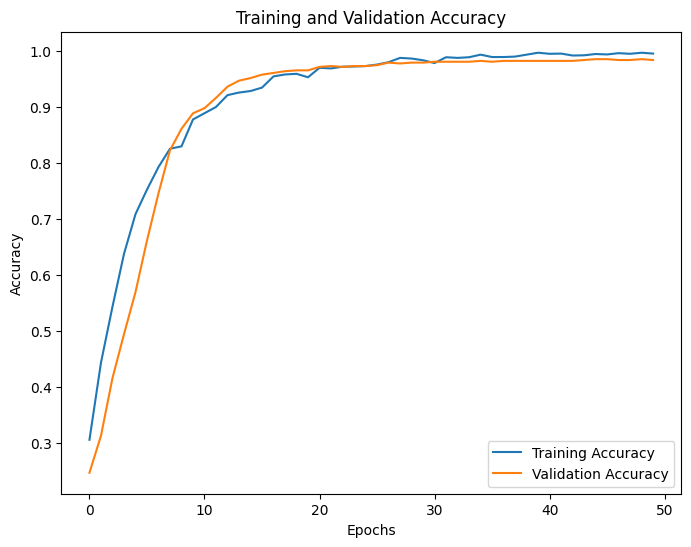

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

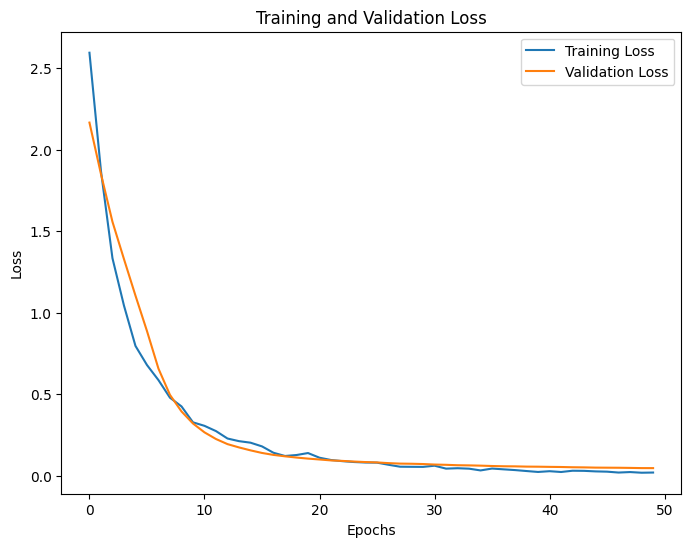

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model.save('resnet50.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9787 - loss: 0.0540
Test Loss: 0.0468
Test Accuracy: 0.9831


## ResNet50 Evaluation Metrics

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('resnet50.h5')

In [ ]:
from sklearn.metrics import classification_report

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=class_names))


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step
              precision    recall  f1-score   support

      Benign       0.97      0.93      0.95       101
         Pre       0.97      0.98      0.98       197
         Pro       0.99      1.00      0.99       193
       Early       1.00      0.99      1.00       161

    accuracy                           0.98       652
   macro avg       0.98      0.98      0.98       652
weighted avg       0.98      0.98      0.98       652



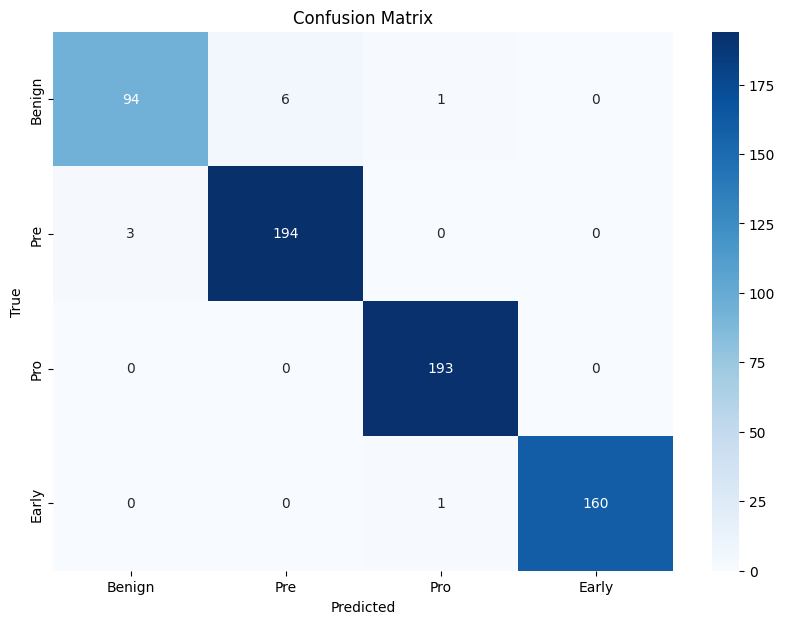

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


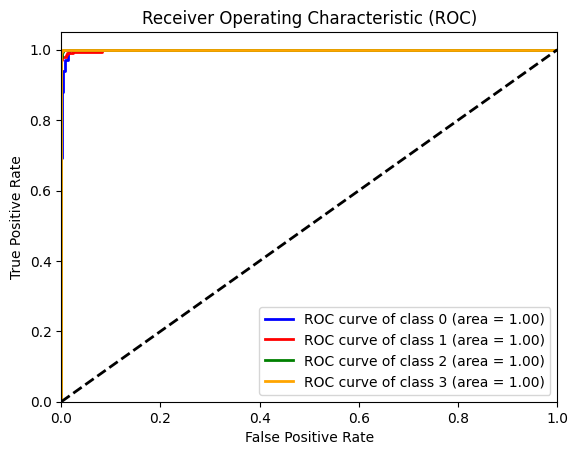

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert y_test to one-hot encoding
y_test_one_hot = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust classes as needed

# Predict probabilities
y_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'orange']  # Adjust for your classes

for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



## EfficientNetB0 Model Training

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-6),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    callbacks=[early_stopping])

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.2623 - loss: 2.0601 - val_accuracy: 0.2822 - val_loss: 1.4204
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 440ms/step - accuracy: 0.3157 - loss: 1.8489 - val_accuracy: 0.3006 - val_loss: 1.4143
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.3844 - loss: 1.6415 - val_accuracy: 0.3144 - val_loss: 1.4125
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 449ms/step - accuracy: 0.4443 - loss: 1.4387 - val_accuracy: 0.3236 - val_loss: 1.3929
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 439ms/step - accuracy: 0.4915 - loss: 1.3346 - val_accuracy: 0.3558 - val_loss: 1.3556
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.5261 - loss: 1.1936 - val_accuracy: 0.4003 - val_loss: 1.2939
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 438ms/step - accuracy: 0.5564 - loss: 1.1225 - val_accuracy: 0.4739 - val_loss: 1.2111
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 439ms/step - accuracy: 0.6083 - loss: 0.9944 - val_accura

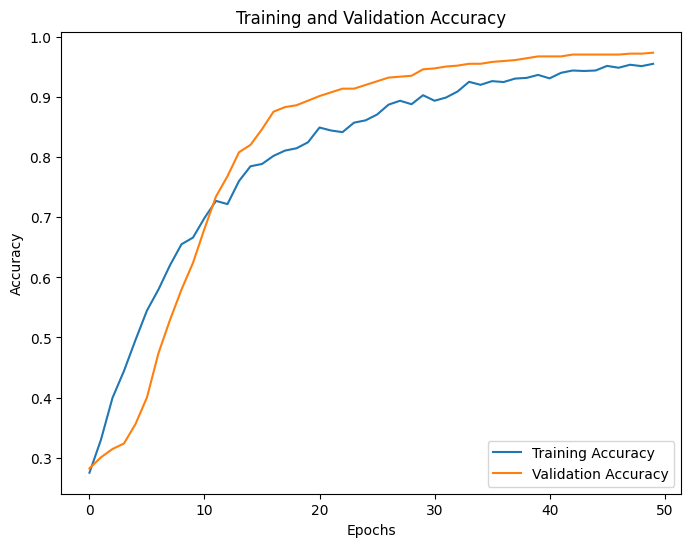

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

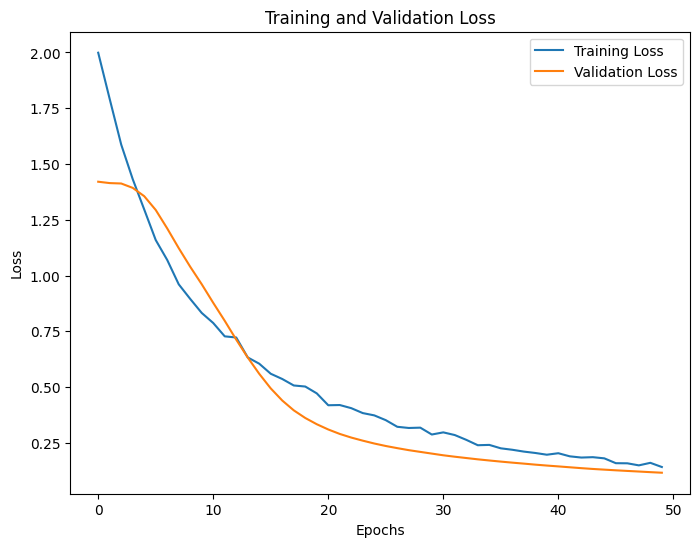

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
model.save('efficientnetb0.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9700 - loss: 0.1228
Test Loss: 0.1164
Test Accuracy: 0.9739


## EfficientNetB0 Evaluation Metrics

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('efficientnetb0.h5')

In [ ]:
from sklearn.metrics import classification_report

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=class_names))

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 218ms/step
              precision    recall  f1-score   support

      Benign       0.96      0.92      0.94       101
         Pre       0.95      0.97      0.96       197
         Pro       0.98      0.99      0.99       193
       Early       1.00      0.99      0.99       161

    accuracy                           0.97       652
   macro avg       0.97      0.97      0.97       652
weighted avg       0.97      0.97      0.97       652



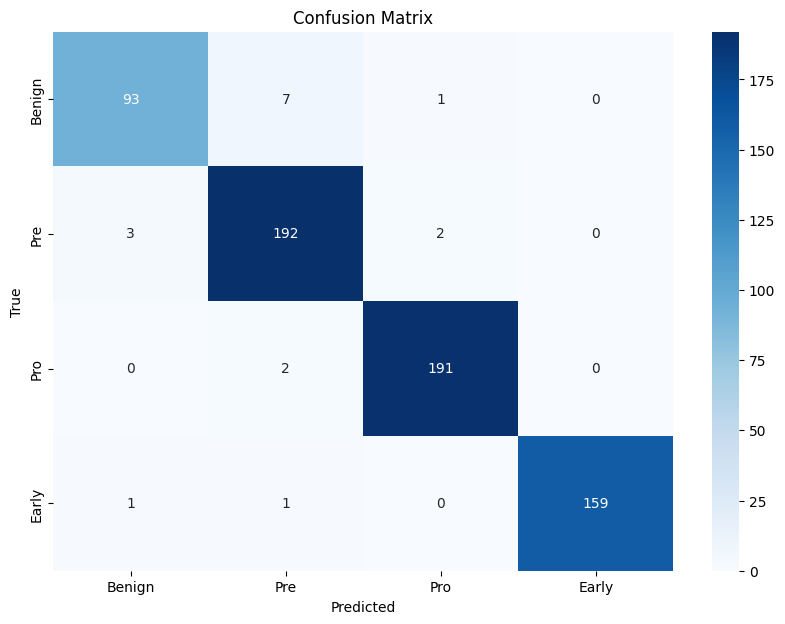

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


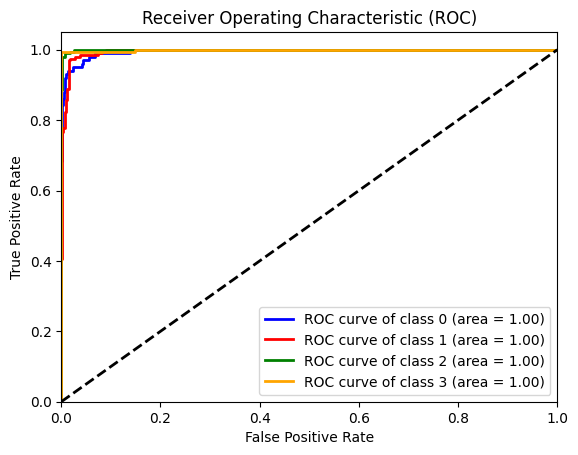

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert y_test to one-hot encoding
y_test_one_hot = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust classes as needed

# Predict probabilities
y_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'orange']  # Adjust for your classes

for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## VGG16 MODEL TRAINING

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-6),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    callbacks=[early_stopping])

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.2433 - loss: 10.3553 - val_accuracy: 0.2531 - val_loss: 3.8150
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 785ms/step - accuracy: 0.2767 - loss: 5.6396 - val_accuracy: 0.3420 - val_loss: 2.4553
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 784ms/step - accuracy: 0.3113 - loss: 3.9033 - val_accuracy: 0.3865 - val_loss: 1.8018
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 784ms/step - accuracy: 0.3360 - loss: 2.9598 - val_accuracy: 0.4755 - val_loss: 1.4450
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 786ms/step - accuracy: 0.3861 - loss: 2.4446 - val_accuracy: 0.5276 - val_loss: 1.2320
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 785ms/step - accuracy: 0.3988 - loss: 2.1629 - val_accuracy: 0.5752 - val_loss: 1.0888
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 784ms/step - accuracy: 0.4436 - loss: 1.7856 - val_accuracy: 0.6104 - val_loss: 0.9823
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 785ms/step - accuracy: 0.4726 - loss: 1.6692 - val_accur

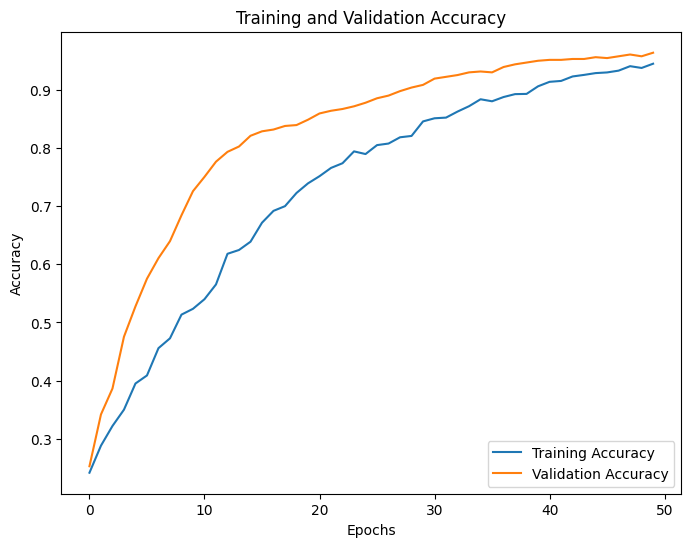

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

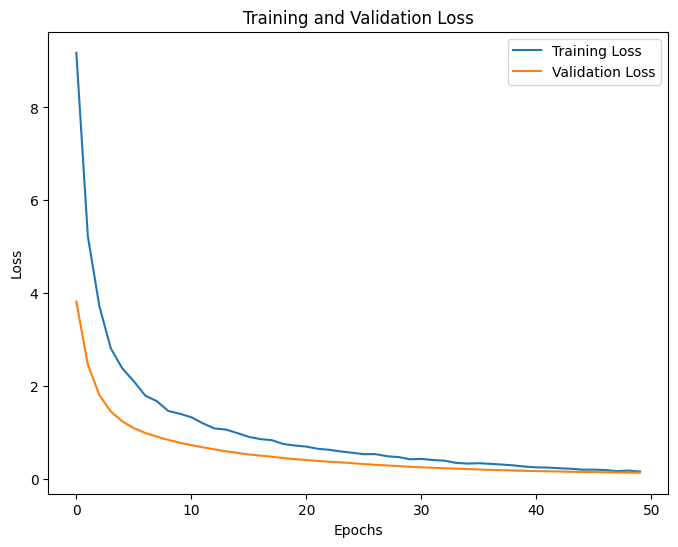

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model.save('vgg16.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.9520 - loss: 0.1488
Test Loss: 0.1262
Test Accuracy: 0.9632


## VGG16 Evaluation

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('vgg16.h5')

In [ ]:
from sklearn.metrics import classification_report

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=class_names))


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
              precision    recall  f1-score   support

      Benign       0.90      0.91      0.91       101
         Pre       0.94      0.94      0.94       197
         Pro       0.98      0.98      0.98       193
       Early       1.00      0.99      1.00       161

    accuracy                           0.96       652
   macro avg       0.96      0.96      0.96       652
weighted avg       0.96      0.96      0.96       652



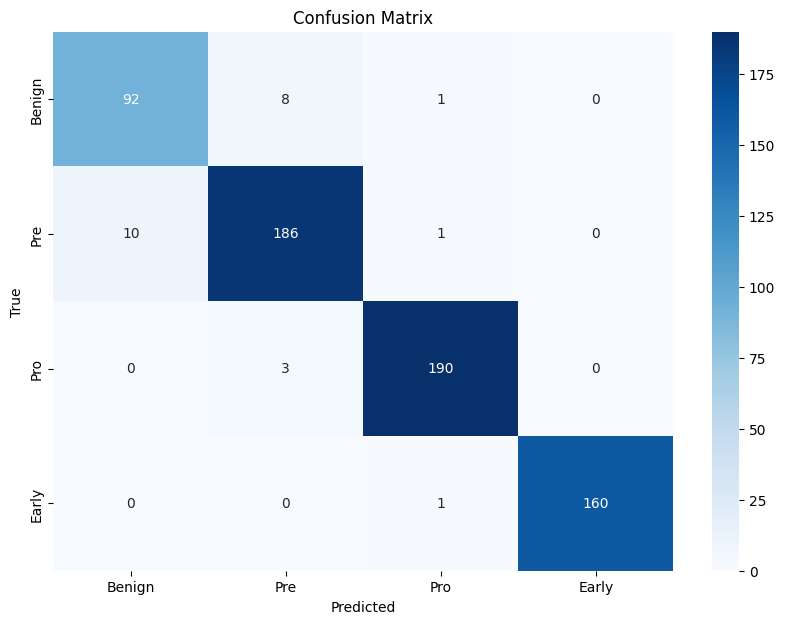

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


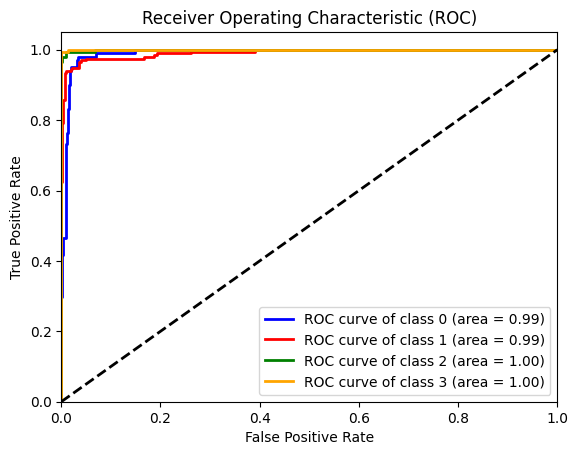

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert y_test to one-hot encoding
y_test_one_hot = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust classes as needed

# Predict probabilities
y_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'orange']  # Adjust for your classes

for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()